In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("../data/processed.csv")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,...,high-performance,diesel,crossover,hybrid,hatchback,flex_fuel,performance,factory_tuner,luxury,exotic
0,other,other,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,0,0,1,1,1,0
1,other,other,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
2,other,other,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,0,0,1,0,1,0
3,other,other,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
4,other,other,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0


In [12]:
num_col = df.select_dtypes(exclude="object").columns.to_list()
cat_col = df.select_dtypes("object").columns.to_list()
 

# numerical col

engine_hp,	engine_cylinders,	number_of_doors,	highway_mpg,city_mpg,	popularity,	msrp	

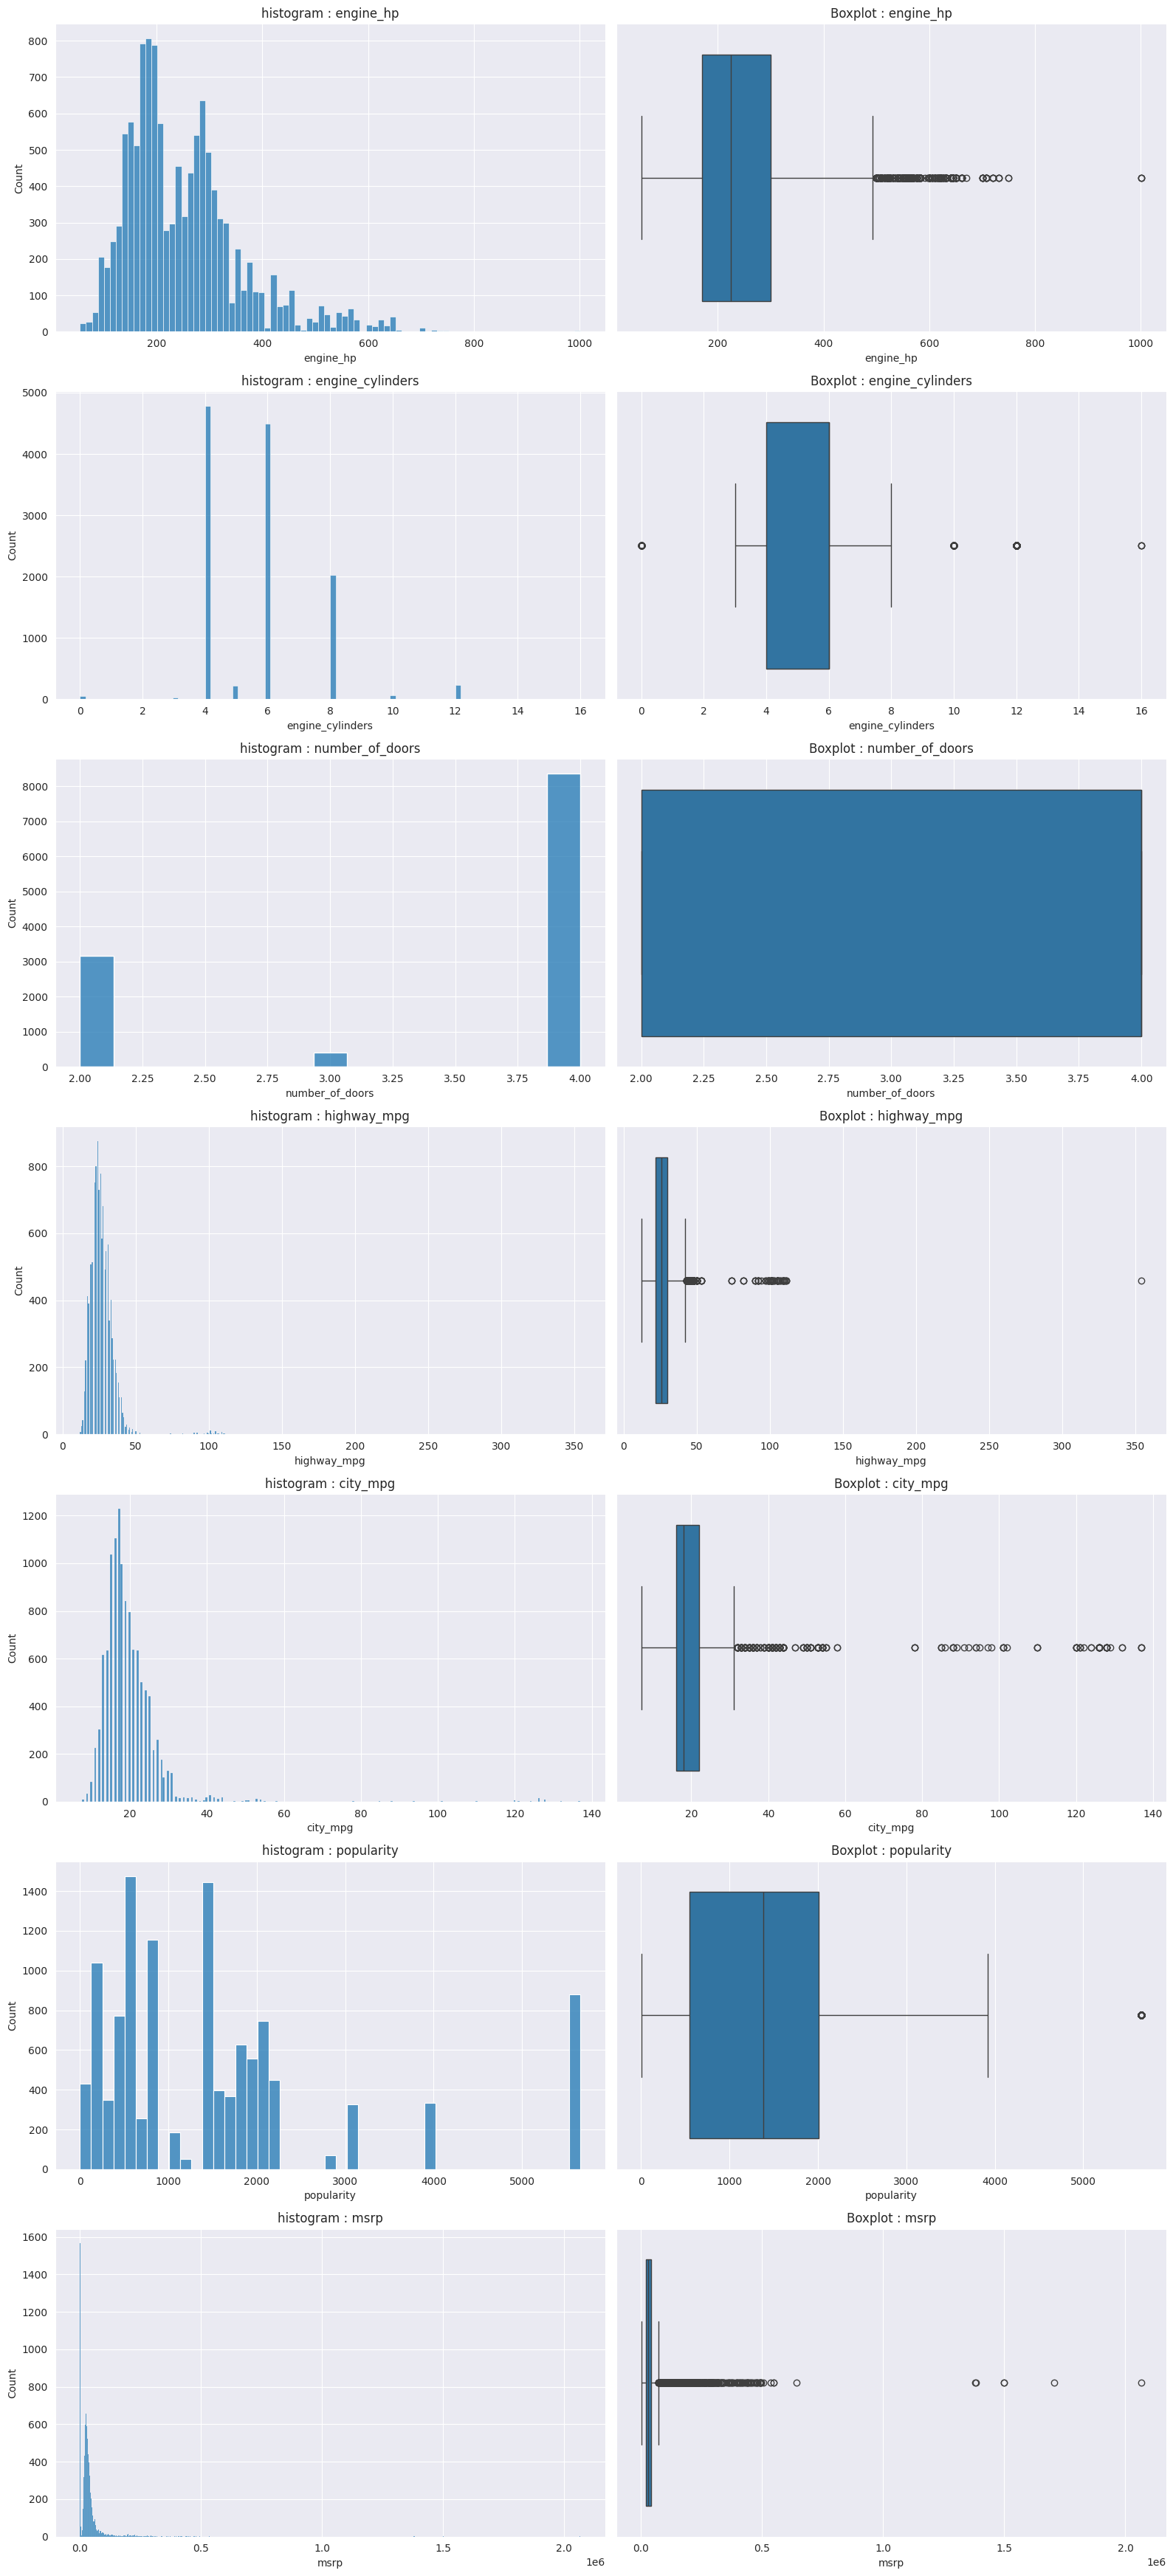

In [13]:
selected_columns =  ["engine_hp",	"engine_cylinders",	"number_of_doors",	"highway_mpg","city_mpg",	"popularity",	"msrp"]

plt.figure(figsize=(16,5*len(selected_columns )))
sns.set_style("darkgrid")

def plot_feature(data ,col,plot_num):
    plt.subplot(len(selected_columns),2,plot_num)
    sns.histplot(data=data,x=col)
    plt.title( f"histogram : {col}")

    plt.subplot(len(selected_columns),2,plot_num +1)
    sns.boxplot(data=data,x=col)
    plt.title( f'Boxplot : {col}')

    
for num,col in enumerate(selected_columns):
    plot_feature(df,col,2*num + 1)
plt.tight_layout()
plt.show()



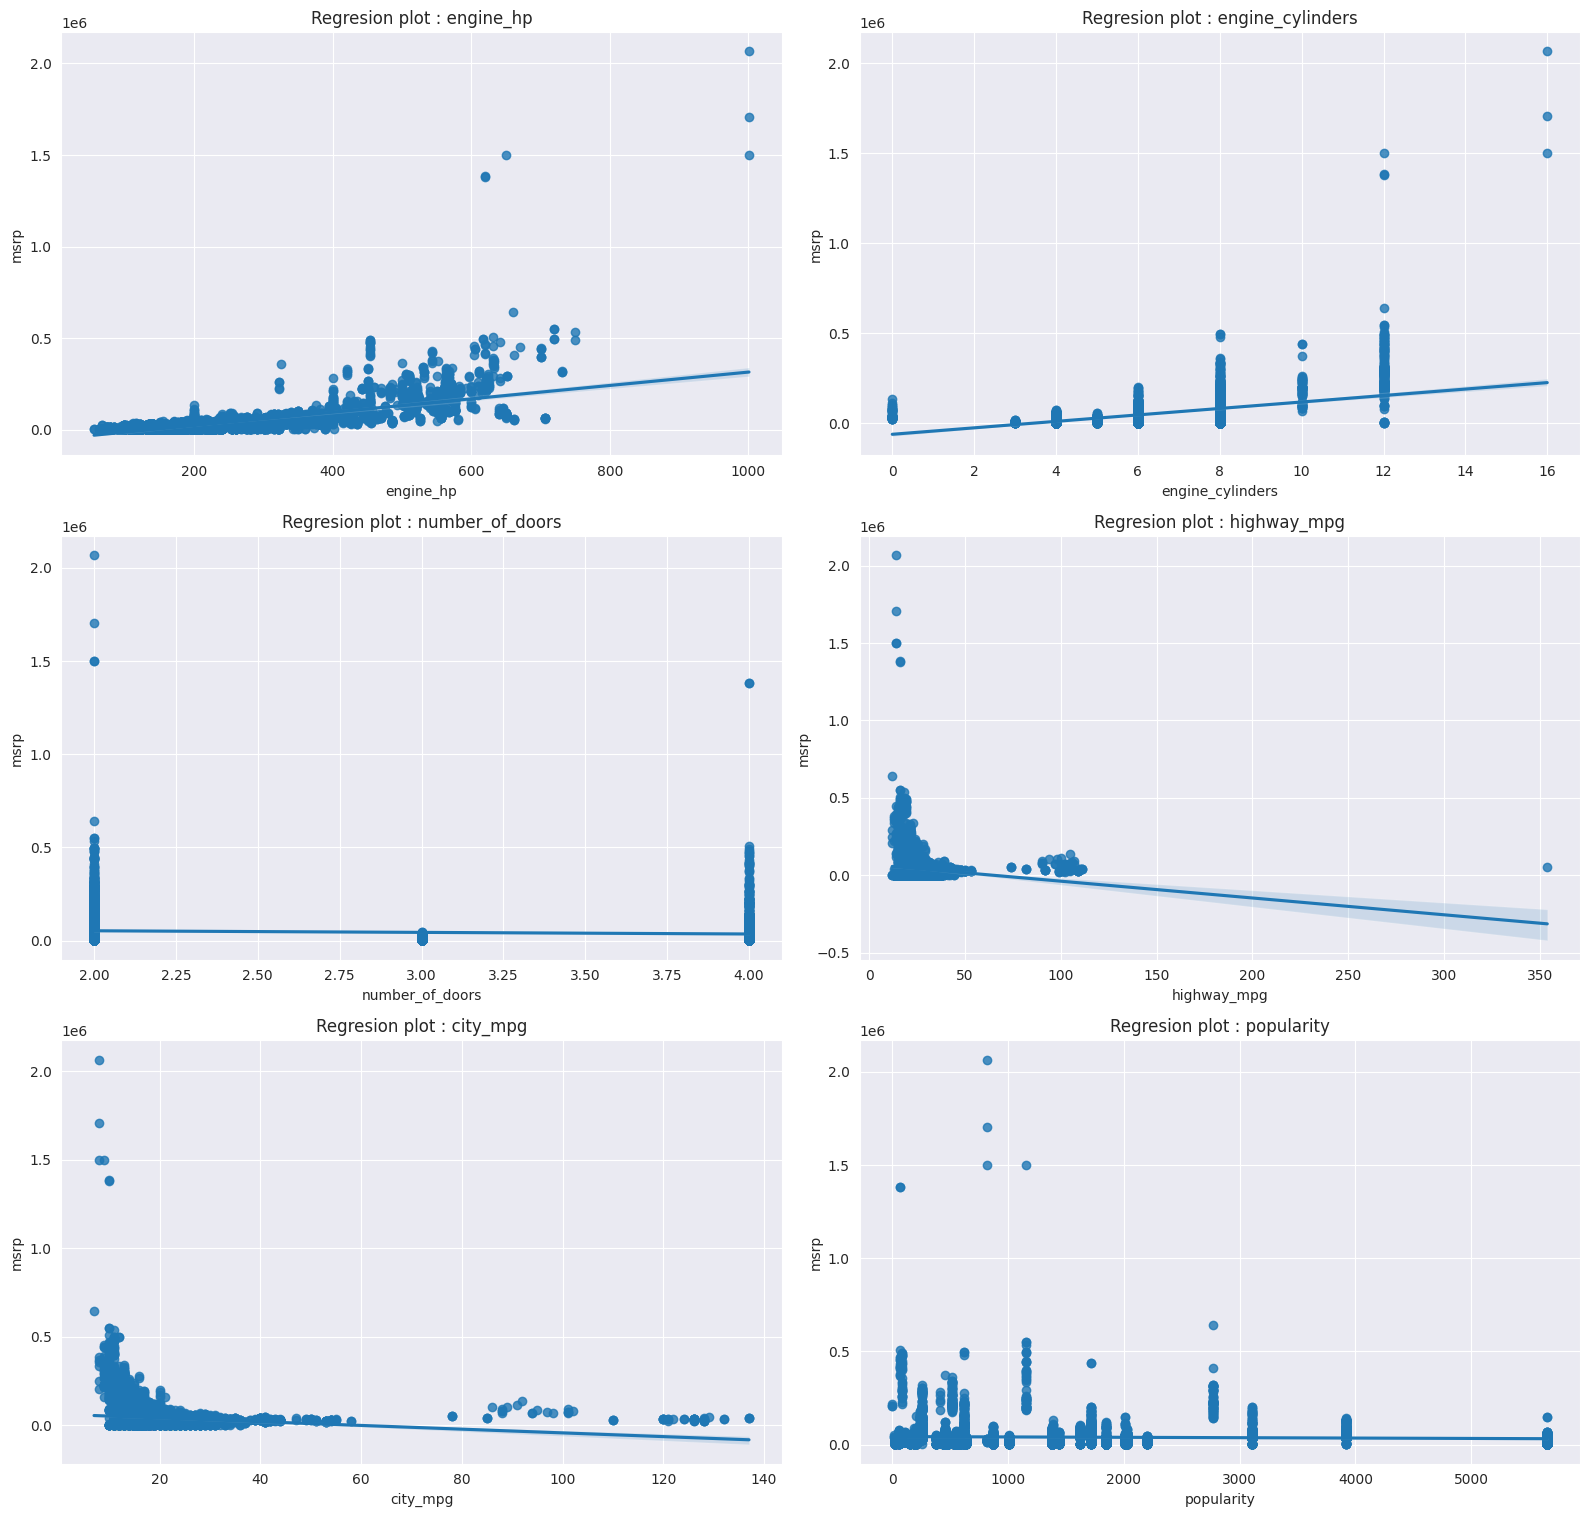

In [14]:
plt.figure(figsize=(16,5*len(selected_columns )))
sns.set_style("darkgrid")

def plot_feature(data ,col,plot_num):
    plt.subplot(len(selected_columns),2,plot_num)
    sns.regplot(data=data,x=col,y="msrp")
    plt.title( f"Regresion plot : {col}")
 
    
for num,col in enumerate(selected_columns):
    if col != "msrp":
        plot_feature(df,col,num + 1)
plt.tight_layout()
plt.show()

# Outliers

In [15]:
def remove_outliers(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    return np.clip(data,lower_fence,upper_fence,)
 


In [16]:
for col in selected_columns:
    df[col] = remove_outliers(df[col])
     

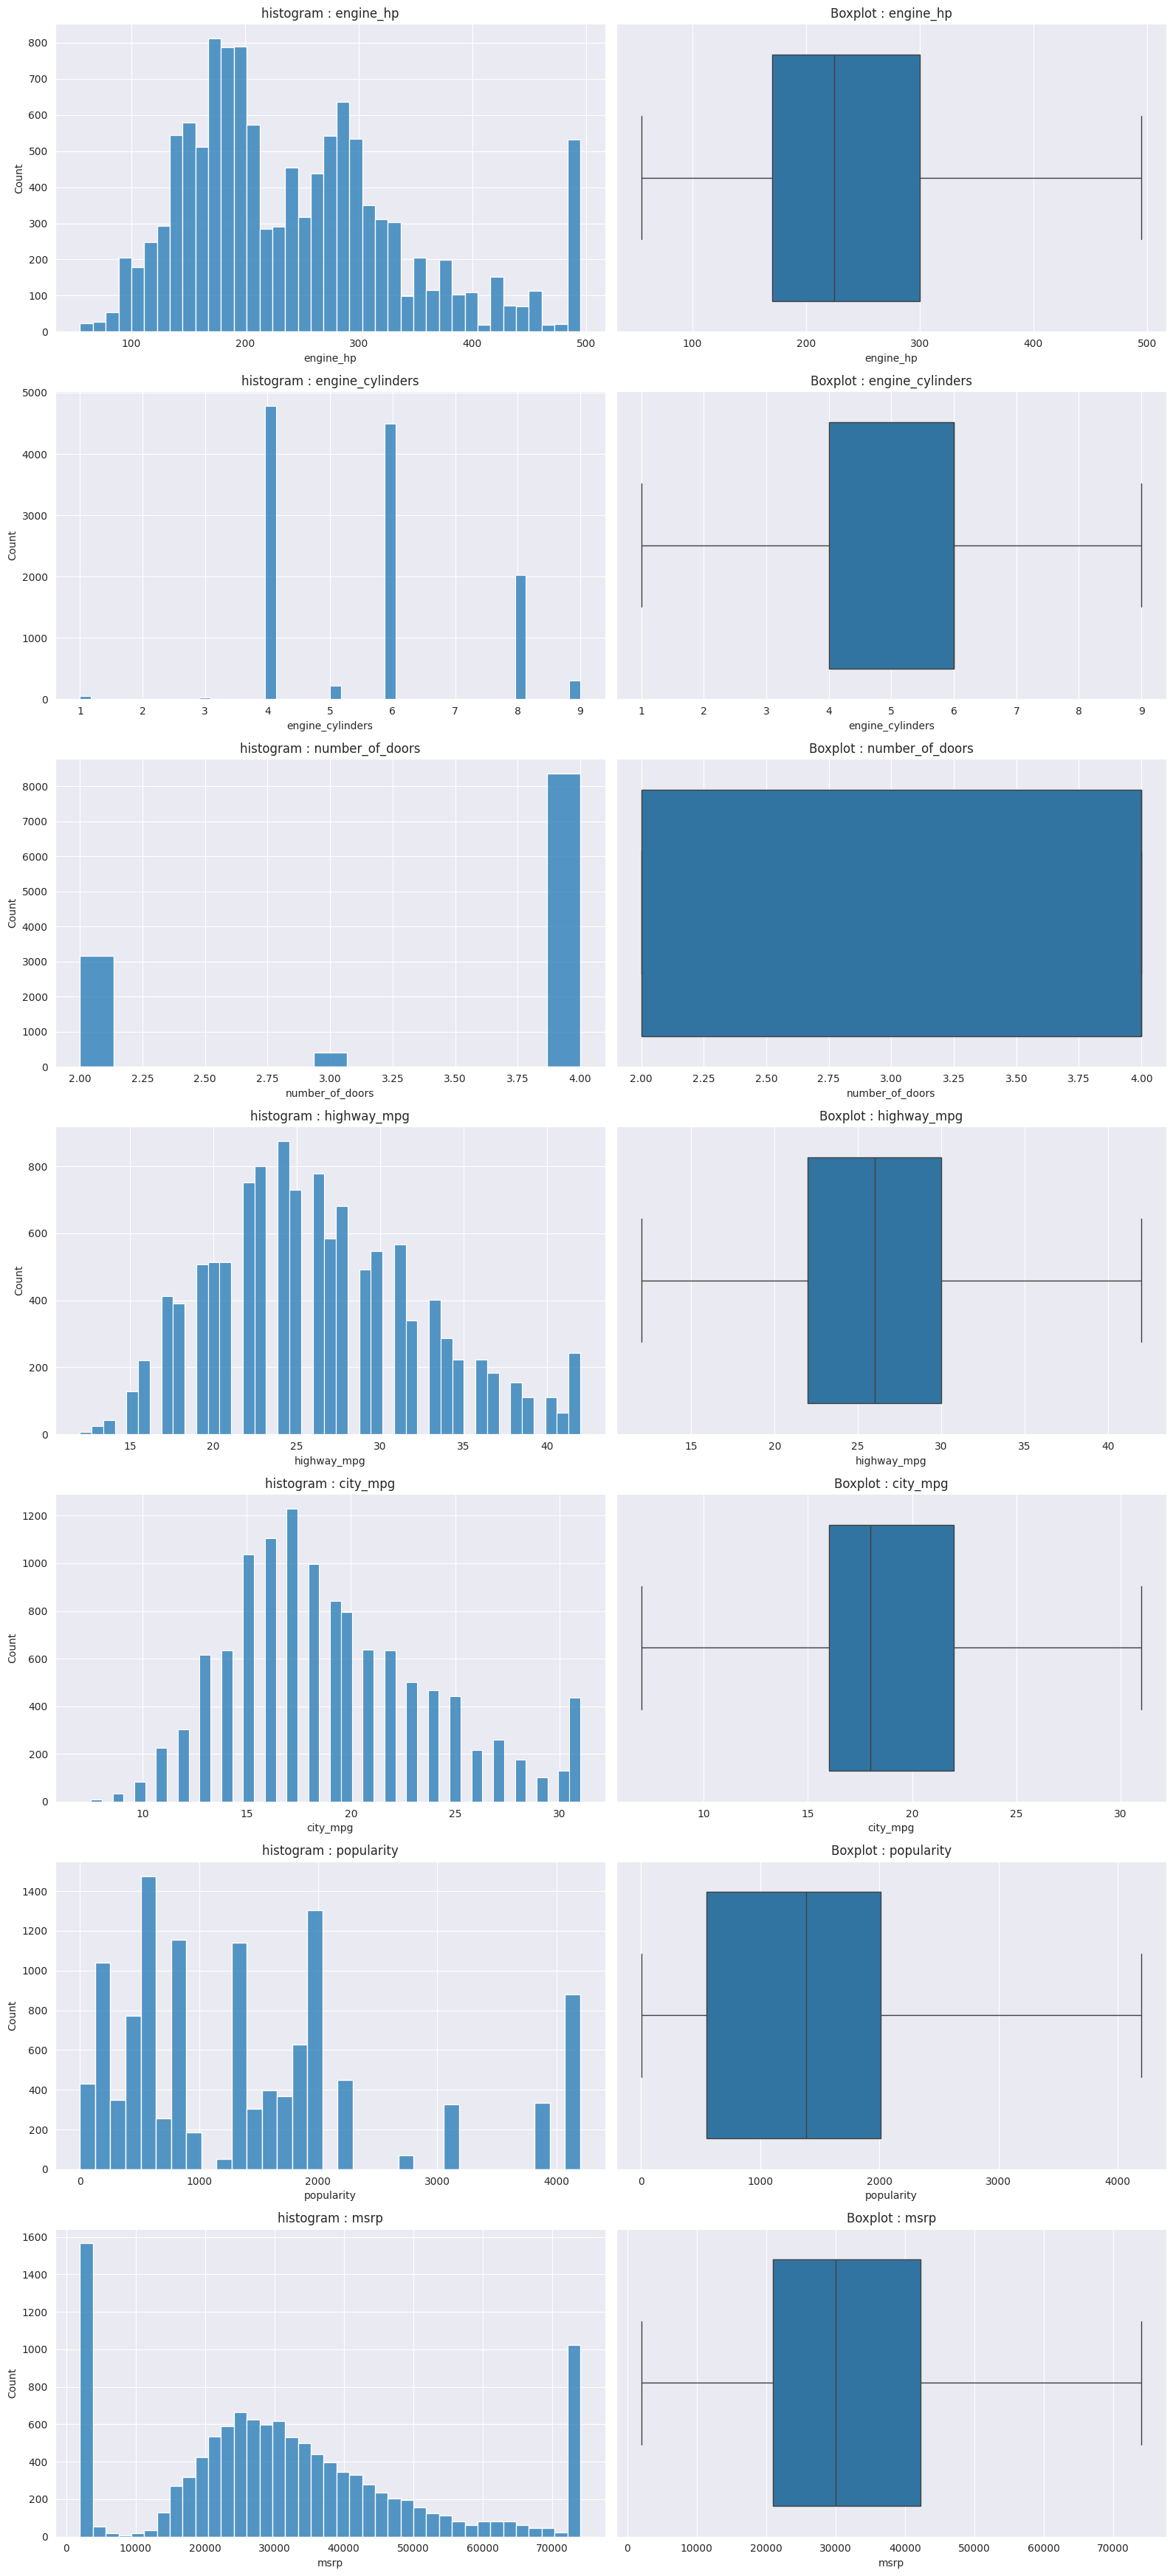

In [17]:
plt.figure(figsize=(16,5*len(selected_columns )))
sns.set_style("darkgrid")

def plot_feature(data ,col,plot_num):
    plt.subplot(len(selected_columns),2,plot_num)
    sns.histplot(data=data,x=col)
    plt.title( f"histogram : {col}")

    plt.subplot(len(selected_columns),2,plot_num +1)
    sns.boxplot(data=data,x=col)
    plt.title( f'Boxplot : {col}')

    
for num,col in enumerate(selected_columns):
    plot_feature(df,col,2*num + 1)
plt.tight_layout()
plt.show()


In [18]:
df.to_csv("../data/clean_data.csv",index=False)